In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np
from pyha.applications.dc_removal_limesdr.dc_removal_limesdr import *

# GitHub cannot display the Table of Contents!

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Test

In [11]:
2**-11

0.00048828125

## Remove DC component from complex signal

INFO:sim:Running "MODEL" simulation...
INFO:sim:Running "PYHA" simulation...
100%|██████████| 8192/8192 [00:00<00:00, 9145.13it/s]
INFO:sim:Flushing the pipeline to collect 8192 valid samples (currently have 8186)
INFO:sim:Hardware delay is 6


<IPython.core.display.Javascript object>


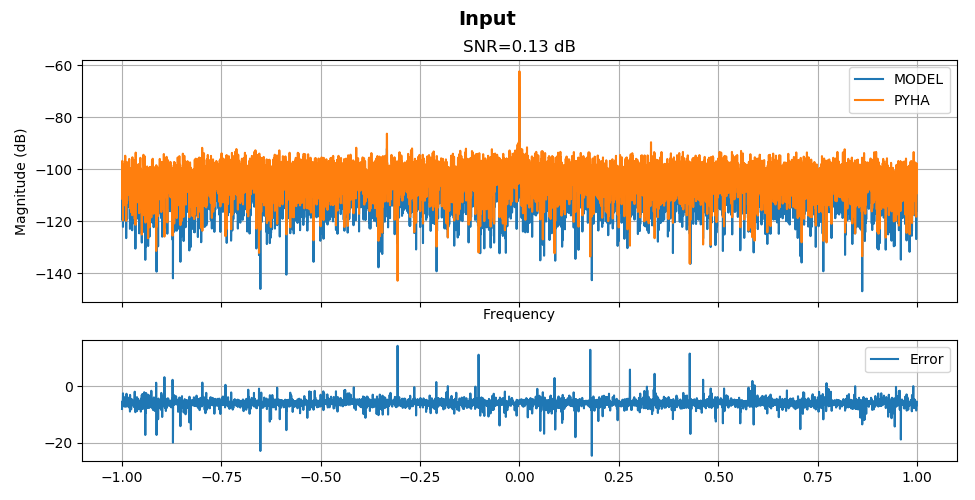

<IPython.core.display.Javascript object>


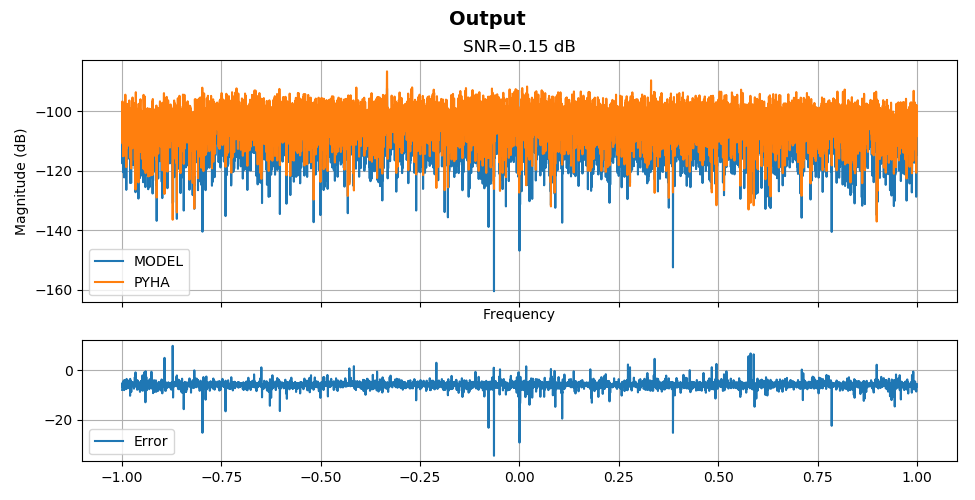

<IPython.core.display.Javascript object>


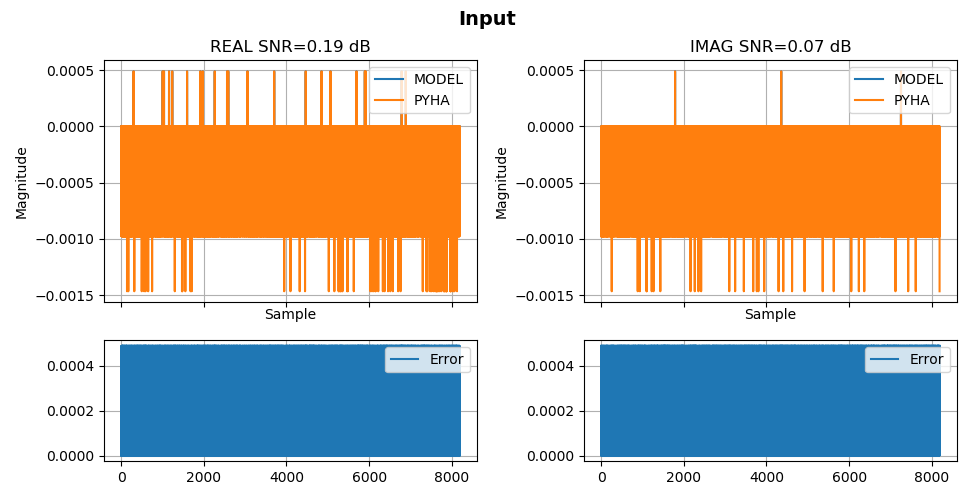

<IPython.core.display.Javascript object>


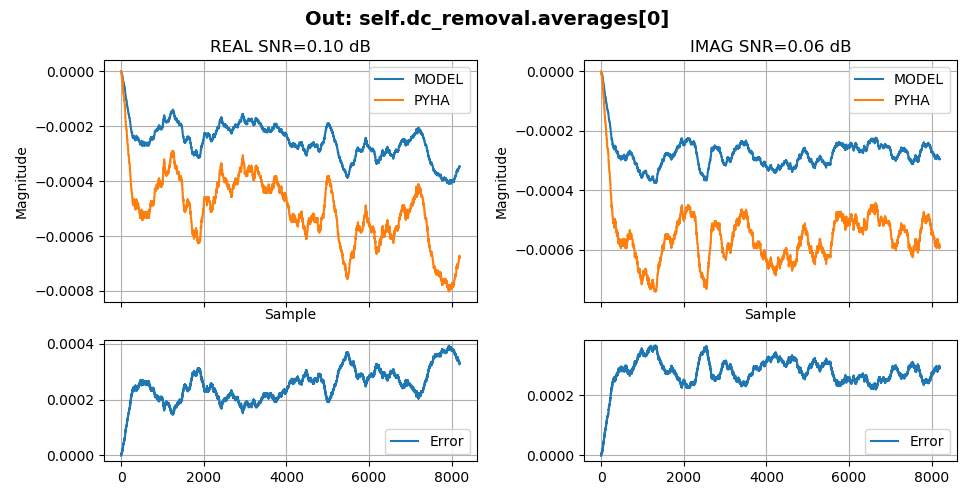

<IPython.core.display.Javascript object>


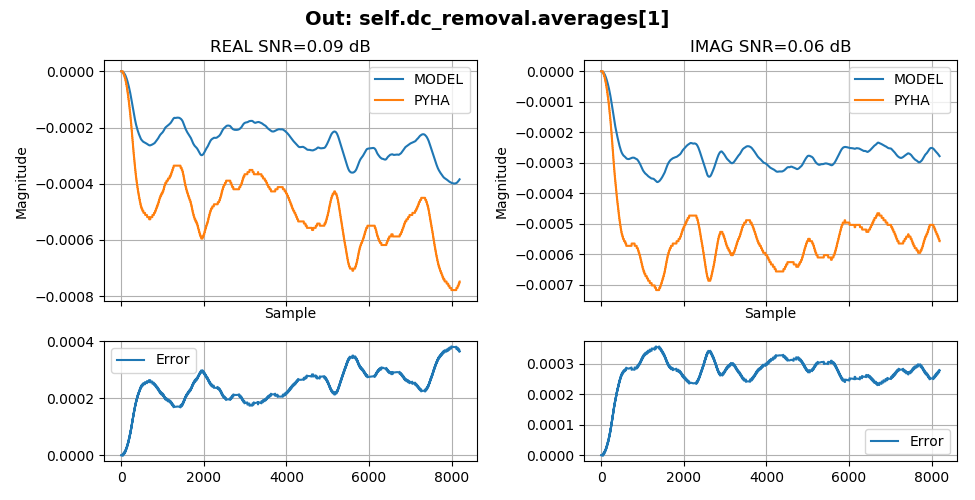

<IPython.core.display.Javascript object>


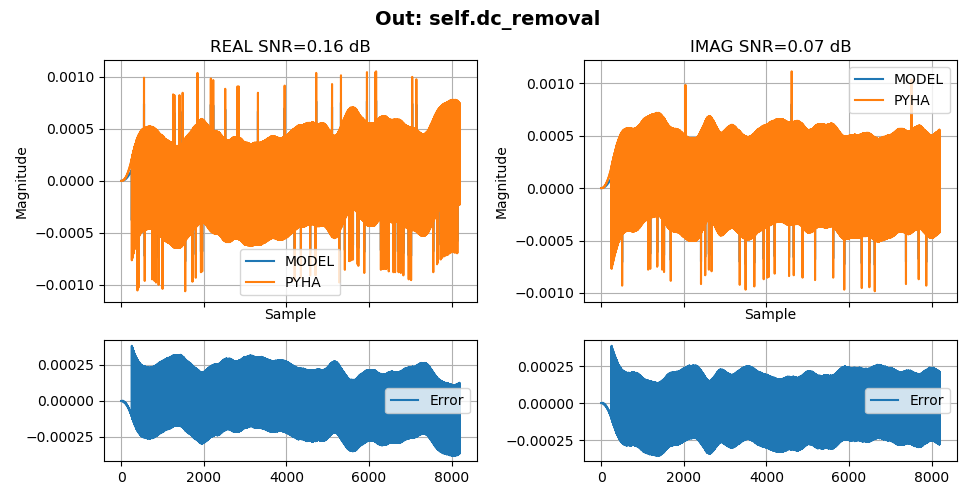

<IPython.core.display.Javascript object>


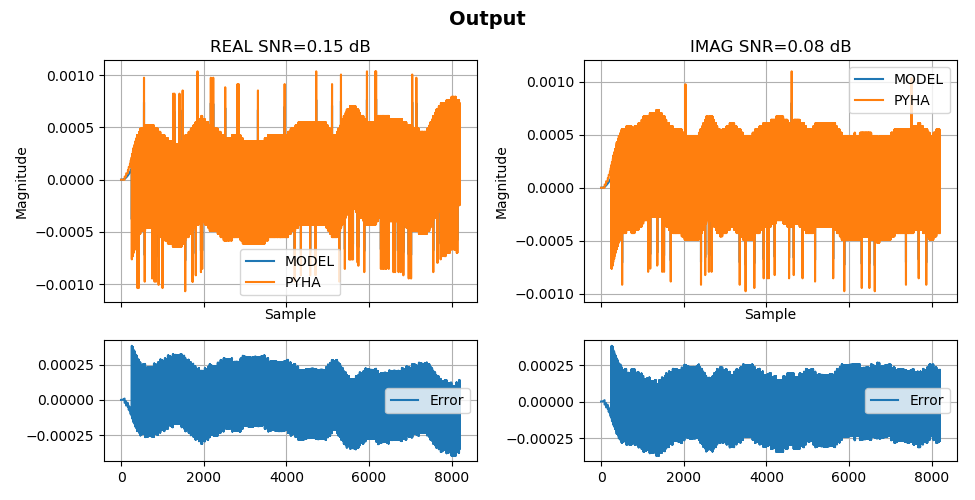

In [10]:
# file = get_data_file('dcspike_bladerf_20m.complex64')
file = get_data_file('gqrx_20180910_155357_2400499992_2999999_fc.raw')
# file = get_data_file('gqrx_20180910_155357_2400499992_2999999_fc.raw')
input_signal = load_complex64_file(file)[:1024*8] # IQ samples

# file = get_data_file('from_tap.raw')
# input_signal = load_complex64_file(file) # IQ samples

dut = DCRemovalLimeSDR()
sim = Simulator(dut, trace=True).run(input_signal) # run simulations and gather trace
sim.plot_trace(mode={'Input': 'frequency', 'Output': 'frequency'}, inout_only=True)
sim.plot_trace()

# Conversion to VHDL and RTL/NETLIST simulations

In [17]:
output_dir = '/tmp/pyha_output'
file = get_data_file('gqrx_20180910_155357_2400499992_2999999_fc.raw')
input_signal = load_complex64_file(file)[:1024*4] # IQ samples

# input_signal = (np.random.normal(size=1024) + np.random.normal(size=1024) * 1j) * 0.25
dut = DCRemovalLimeSDR()
vhdl_sim = Simulator(dut, output_dir=output_dir, extra_simulations=['RTL', 'NETLIST']).run(input_signal)
vhdl_sim.assert_equal(atol=1e-3, rtol=1e-3)

INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "MODEL" simulation...
INFO:sim:Running "PYHA" simulation...
100%|██████████| 4096/4096 [00:02<00:00, 1384.36it/s]
INFO:sim:Flushing the pipeline to collect 4096 valid samples (currently have 4090)
INFO:sim:Hardware delay is 6
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DCRemoval to VHDL ...
INFO:conversion:DCRemovalLimeSDR to VHDL ...
INFO:sim:Running "RTL" simulation...
loading VPI module '/cocotb/build/libs/x86_64/libvpi.so'
VPI module loaded!
100%|##########| 4102/4102 [00:03<00:00, 1201.86it/s]

INFO:sim:Running "NETLIST" simulation...
INFO:synth:Running quartus_ma

In [18]:
vhdl_sim.out[1]

array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.00048828+0.j        ,
         0.        +0.j        ,  0.        +0.00048828j]])

In [19]:
vhdl_sim.out[2]

array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.00048828+0.j        ,
         0.        +0.j        ,  0.        +0.00048828j]])

# Synthesis:  resource usage and Fmax

In [5]:
print(vhdl_sim.quartus.get_resource_usage('fit'))
print(vhdl_sim.quartus.get_fmax())

INFO:synth:Running quartus_fit quartus_project...
INFO:synth:Running quartus_sta -t script.tcl...


Family : Cyclone IV E
Device : EP4CE40F23C8
Timing Models : Final
Total logic elements : 483 / 39,600 ( 1 % )
    Total combinational functions : 390 / 39,600 ( < 1 % )
    Dedicated logic registers : 360 / 39,600 ( < 1 % )
Total registers : 360
Total pins : 52 / 329 ( 16 % )
Total virtual pins : 0
Total memory bits : 15,216 / 1,161,216 ( 1 % )
Embedded Multiplier 9-bit elements : 0 / 232 ( 0 % )
Total PLLs : 0 / 4 ( 0 % )

+--------------------------------------------------+
; Fmax Summary                                     ;
+------------+-----------------+------------+------+
; Fmax       ; Restricted Fmax ; Clock Name ; Note ;
+------------+-----------------+------------+------+
; 174.37 MHz ; 174.37 MHz      ; clk        ;      ;
+------------+-----------------+------------+------+
This panel reports FMAX for every clock in the design, regardless of the user-specified clock periods.  FMAX is only computed for paths where the source and destination registers or ports are driven by